At the lecture we talked about convolutional networks, today we will try them. In addition, we will show tensorboard and a library for creating adversarial examples.

## Convolutional networks in tensorflow

Implementing a convolutional network in tensorflow is almost the same as implementing other architectures. Before we get to training the models, we'll look at two frequently used datasets. MNIST contains black and white images of digits 1-10, CIFAR10 contains color images from 10 different classes.

2024-04-22 10:38:38.282833: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 10:38:38.285821: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 10:38:38.458813: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 10:38:39.166367: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 10:38:40.537658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

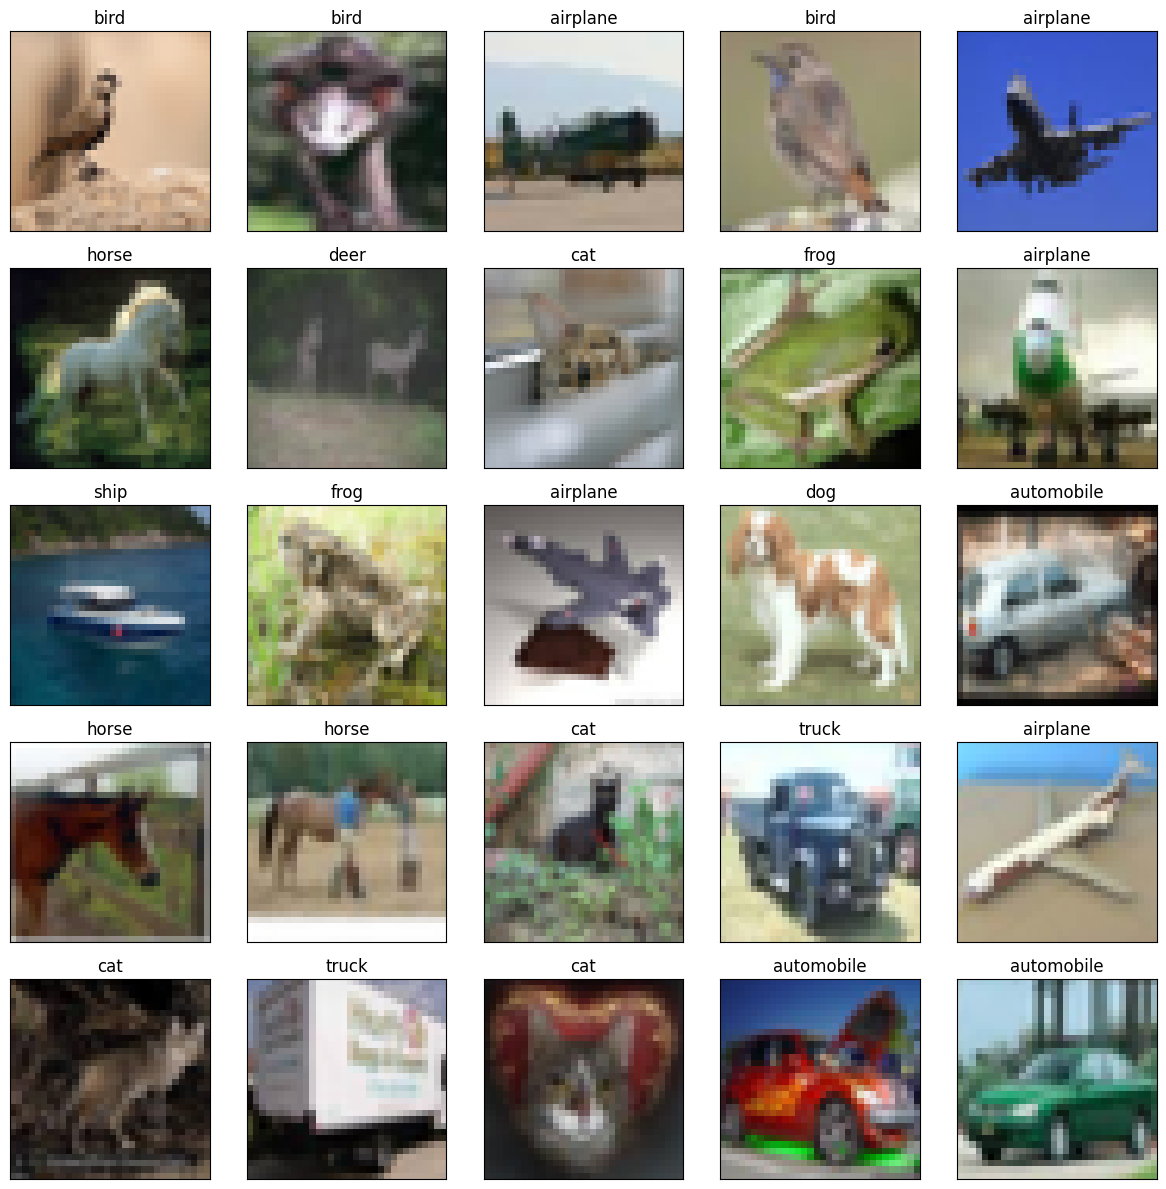

In [2]:
import random

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#I had problem with mutliple imports of the KMP library
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


def show_dataset_examples(X, y, labels):
    plt.figure(figsize=(12,12))
    for i in range(25):
        idx = random.randint(0, X.shape[0] - 1) 
        plt.subplot(5, 5, i+1)
        plt.imshow(X[idx])
        plt.title(labels[y[idx]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

cifar_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

show_dataset_examples(x_train/255, list(map(lambda x: x[0], y_train)), cifar_class_labels)

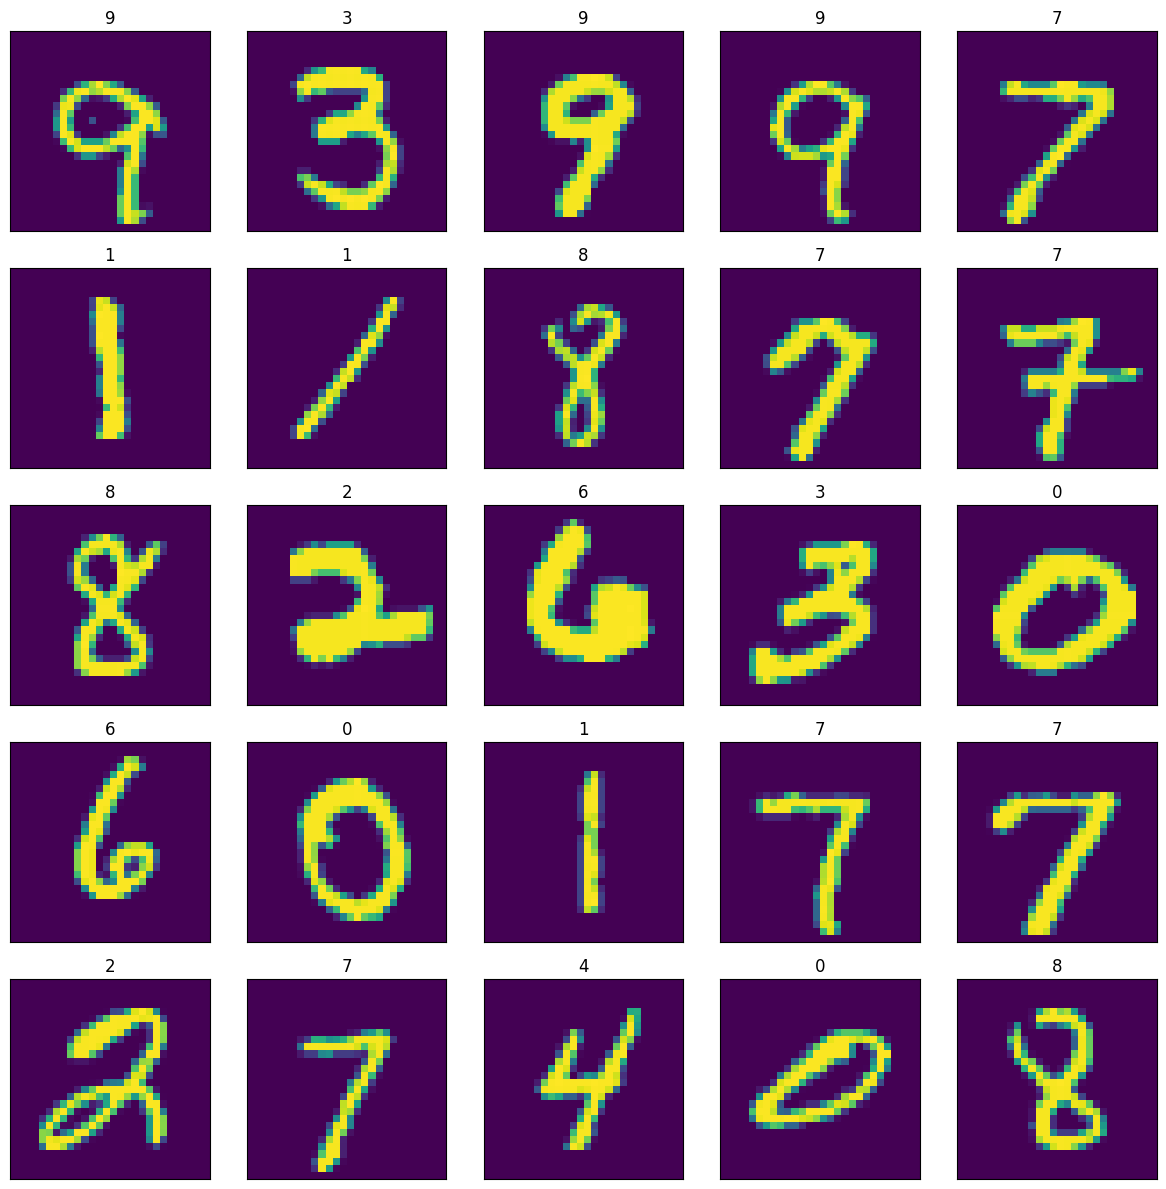

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mnist_class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_dataset_examples(x_train, y_train, mnist_class_labels)

We will now create a simple model and train it to classify digits from MNIST.

In [4]:
nb_classes = 10
input_shape = (28, 28, 1)

x_train = x_train.reshape((-1,) + input_shape)/255

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = input_shape),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5)),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(strides=2, pool_size=(2, 2)),
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dense(units=30, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=nb_classes, activation=tf.keras.activations.linear, name='logits'),
    tf.keras.layers.Activation(activation=tf.nn.softmax)
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=1024, epochs=20)

/home/gabi/miniconda3/envs/envo/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5722 - loss: 1.4000
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.9482 - loss: 0.1823
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9671 - loss: 0.1128
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9760 - loss: 0.0826
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.9805 - loss: 0.0662
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.9827 - loss: 0.0577
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.9836 - loss: 0.0515
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9861 - loss: 0.0453
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.9886 - loss: 0.0381
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9885 - loss: 0.0374
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9904 - loss: 0.0322
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step 

In [5]:
# spocitame accuracy na testovacich datech
x_test = x_test.reshape((-1,) + input_shape)

model.evaluate(x_test/255, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0493


[0.03602048382163048, 0.9887999892234802]

## TASK: Create and fit a model on CIFAR-10. Experiment with the number of layers and hidden sizes.

## Adversarial examples

In the lecture, we also talked about the fact that convolutional networks can be confused quite easily with the help of so-called adversarial examples. We can generate adversarial examples using the `cleverhans` library. This library needs an activation tensor before the last (softmax) layer. But here we have named `logits`, so it is not a problem to take only the part we need from our model.

You can also read [this tutorial](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm)

In [6]:
import numpy as np

from cleverhans.tf2.attacks.fast_gradient_method import fast_gradient_method

# logits = tf.keras.Model(model.inputs, model.get_layer('logits').output)

results = []
eps_vals = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
for eps in eps_vals:
    # Replace clean example with adversarial example for adversarial training
    x_fgm = fast_gradient_method(model, x_test/255, eps, np.inf)
    r = model.evaluate(x_fgm, y_test)[1]
    results.append(r)

print(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.0493
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8025 - loss: 0.6248
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3152 - loss: 3.6718
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1311 - loss: 8.1909
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0827 - loss: 12.4871
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0544 - loss: 16.3333
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0446 - loss: 19.7725
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0364 - loss: 22.8837
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0301 - loss: 25.7802
[0.9887999892234802, 0.8360999822616577, 0.3675000071525574, 0.16060000658035278, 0.09839999675750732, 0.06480000168085098, 0.0502999983727932, 0.04019999876618385, 0.03310000151395798]


We can now show, how the predictions get worse with increasing level of noise and some examples of the adversarial examples.

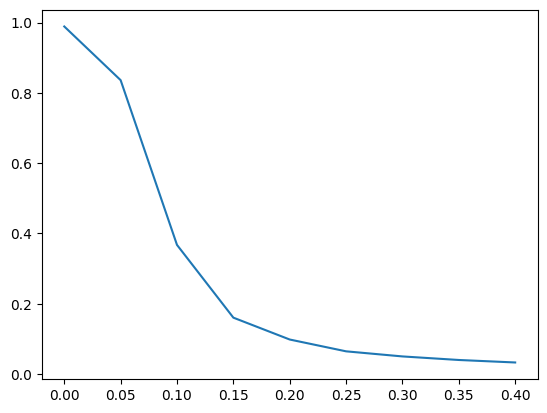

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0493
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epsilon value: 0.0, Accuracy: 0.9887999892234802


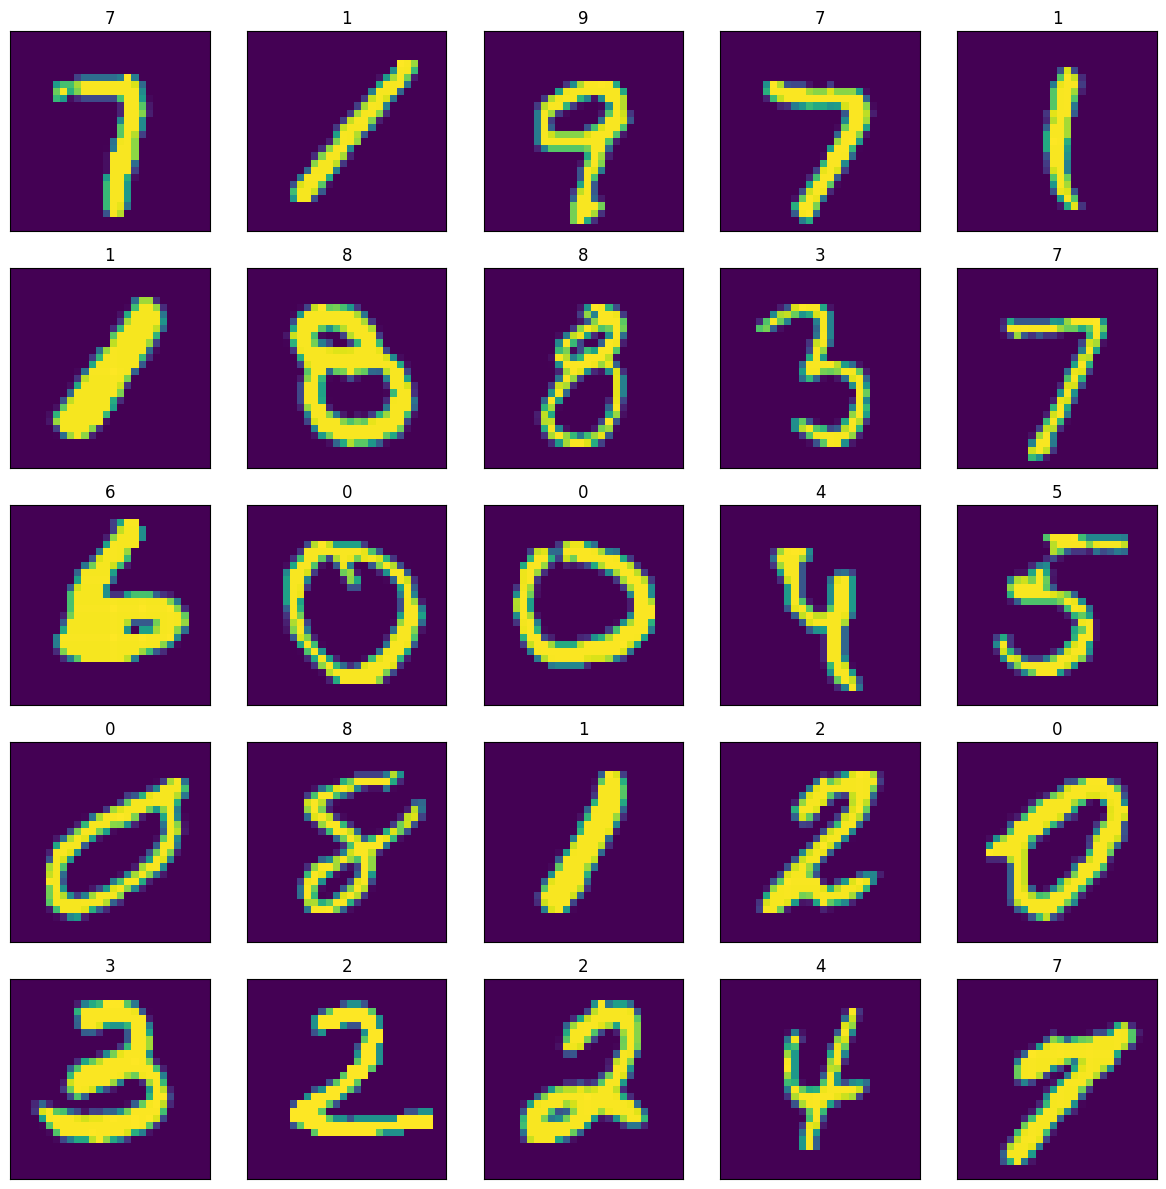

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1865 - loss: 5.9525
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epsilon value: 0.12549019607843137, Accuracy: 0.22859999537467957


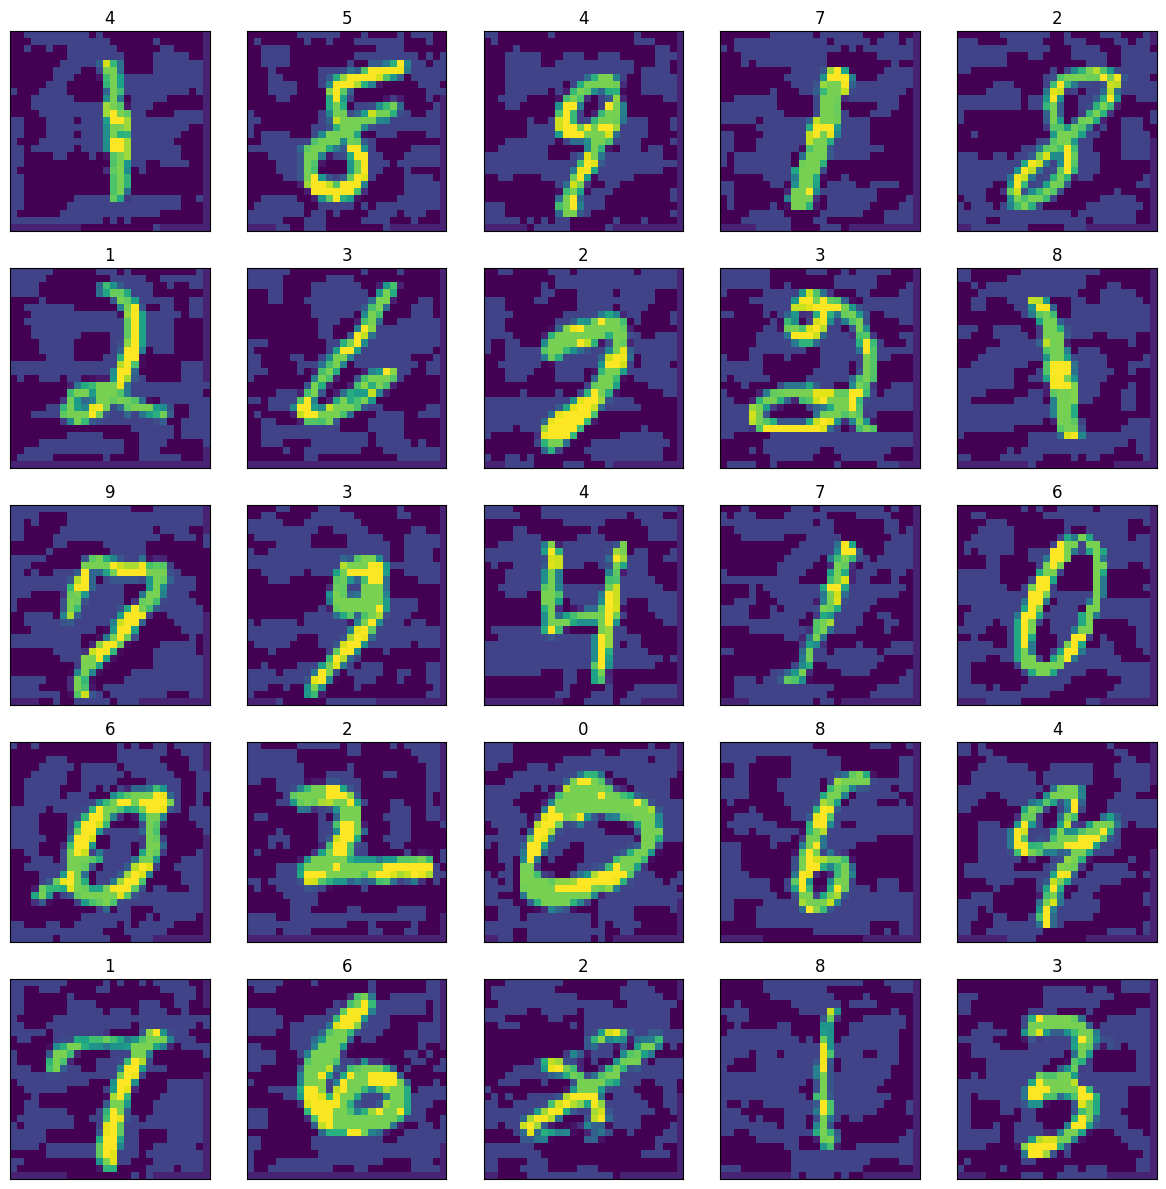

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9695 - loss: 0.0726
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epsilon value: 0.01568627450980392, Accuracy: 0.9761000275611877


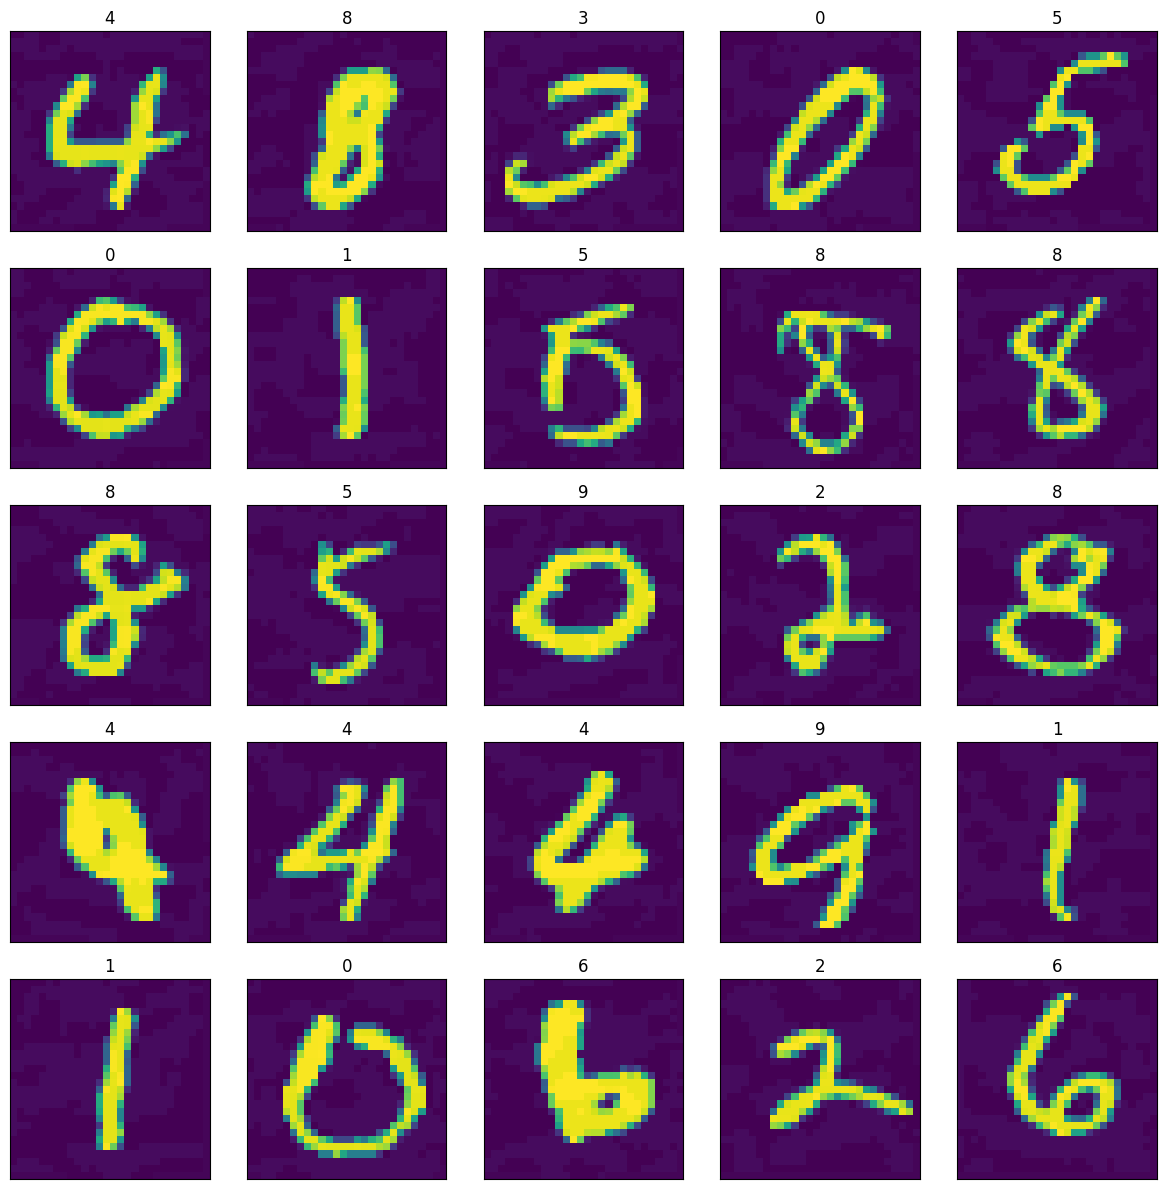

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8823 - loss: 0.3447
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epsilon value: 0.0392156862745098, Accuracy: 0.9042999744415283


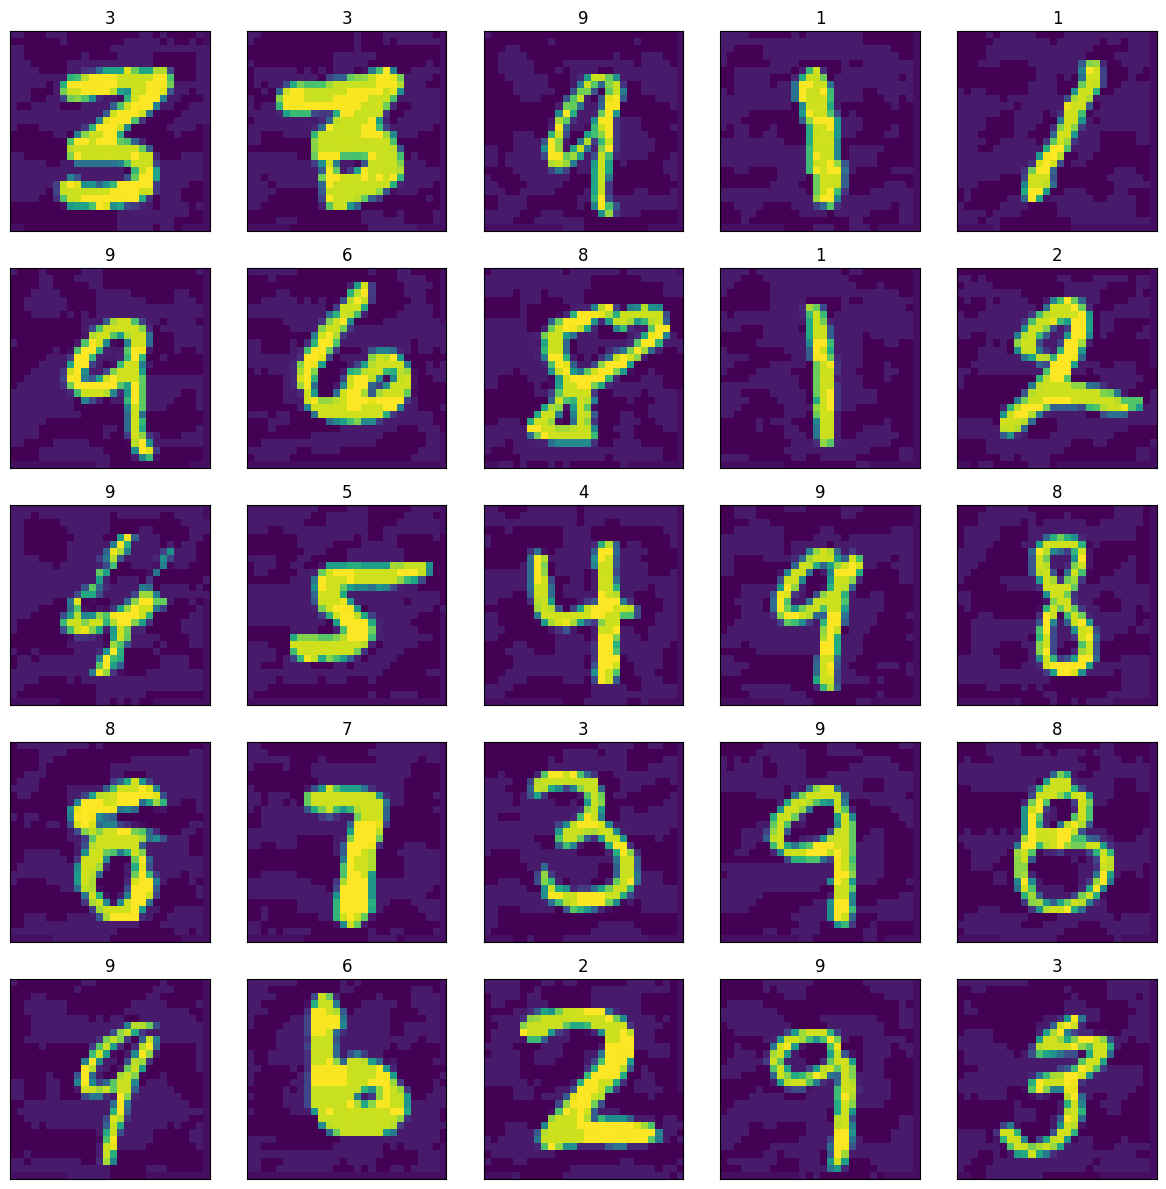

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5219 - loss: 2.0196
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epsilon value: 0.0784313725490196, Accuracy: 0.5763999819755554


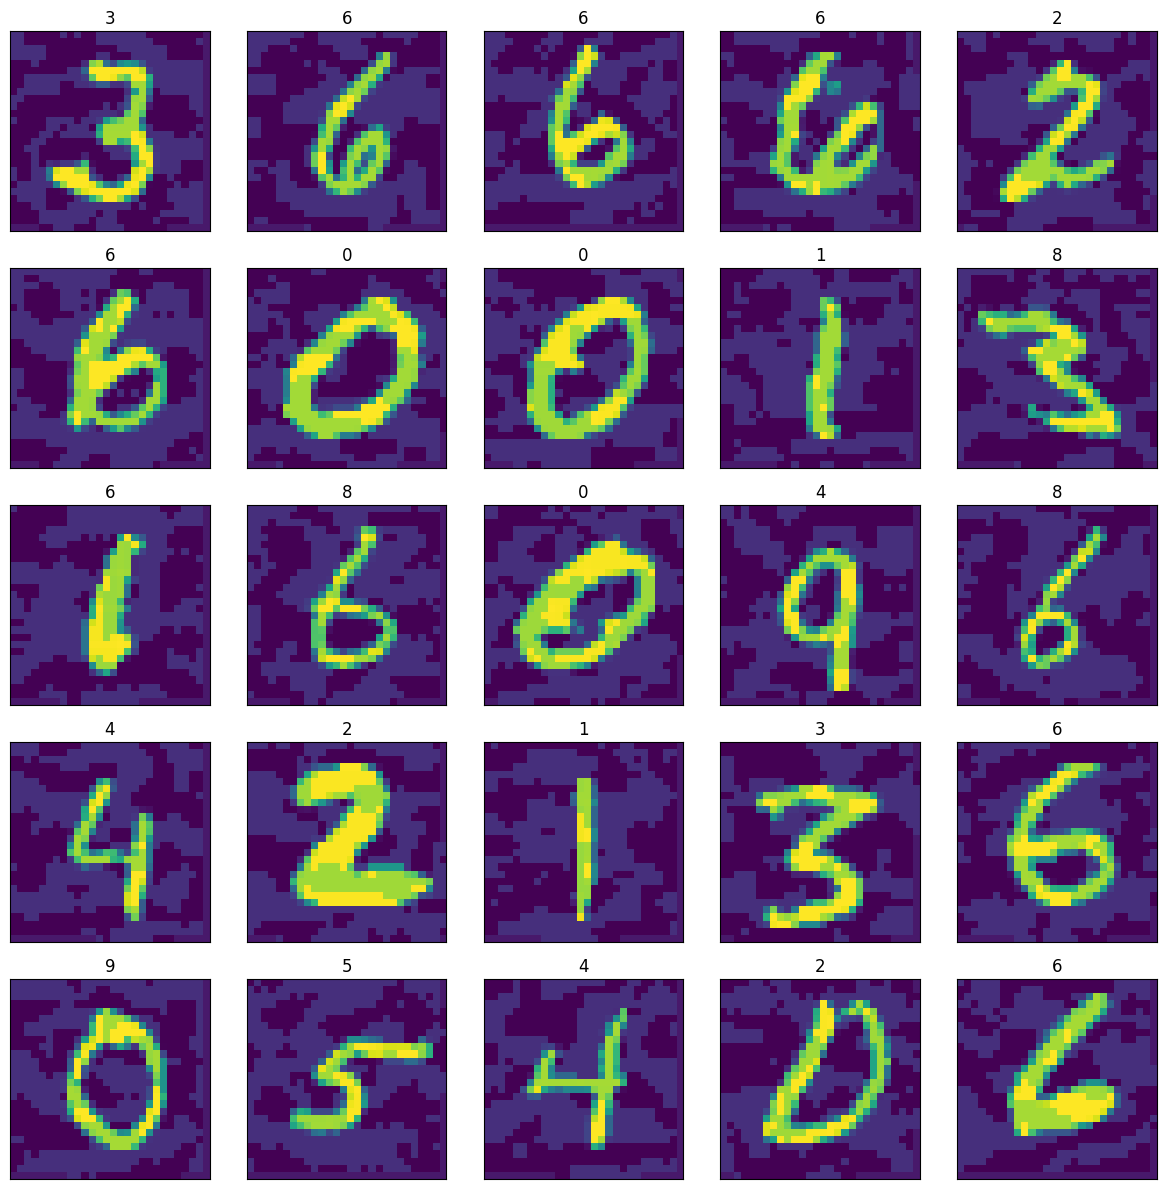

In [14]:
eps_vals = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
plt.plot(eps_vals, results)
plt.show()

mnist_class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

eps_vals = eps_vals[::2] 
eps_vals = [0.0, 32/255, 4/255, 10/255, 20/255]
for eps in eps_vals:
    x_fgm = fast_gradient_method(model, x_test/255, eps, np.inf)
    adv_x = tf.reshape(x_fgm, [-1, 28, 28])
    r = model.evaluate(x_fgm, y_test)[1]

    # TODO print predicted labels (not y_test)
    
    print(f'Epsilon value: {eps}, Accuracy: {r}')
    show_dataset_examples(x_fgm, labels, mnist_class_labels)

# Using pre-trained models

Fitting models on large datasets is slow. Fortunatelly, there is a number of publicly available models trained on datasets such as ImageNet, that we can use in other project. One example of such a model is VGG16. Let us try to download the model and use it to classify some images.

In [15]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16()
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 43s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
image = load_img('dog.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

yhat = model.predict(image)
labels = decode_predictions(yhat)
label = labels[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))
print(labels)

x_fgm = fast_gradient_method(model, image, eps, np.inf)
yhat = model.predict(x_fgm)
labels = decode_predictions(yhat)
label = labels[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))
print(labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
English_foxhound (40.67%)
[[('n02089973', 'English_foxhound', 0.40665683), ('n02095314', 'wire-haired_fox_terrier', 0.26522326), ('n02089867', 'Walker_hound', 0.15244748), ('n02100236', 'German_short-haired_pointer', 0.038872562), ('n02095570', 'Lakeland_terrier', 0.016119367)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
wire-haired_fox_terrier (36.81%)
[[('n02095314', 'wire-haired_fox_terrier', 0.36806172), ('n02089973', 'English_foxhound', 0.30492035), ('n02089867', 'Walker_hound', 0.1296595), ('n02100236', 'German_short-haired_pointer', 0.03659367), ('n02095570', 'Lakeland_terrier', 0.021687899)]]
